In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [6]:
# what does a data contains
print (boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

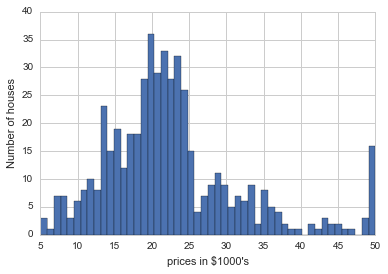

In [7]:
#quick visualisation of the data
#will not be able to call taget for evry dataset. as it is for learning , hence it is a clean data
plt.hist(boston.target,bins= 50)
plt.xlabel("prices in $1000's")
plt.ylabel('Number of houses')

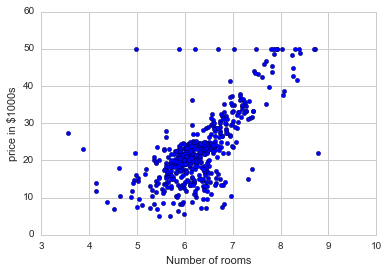

In [8]:
#scatterplot with the target against another label such as Room per dwelling
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('price in $1000s')
plt.xlabel('Number of rooms')

In [10]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names # all are only for this data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['Price'] = boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


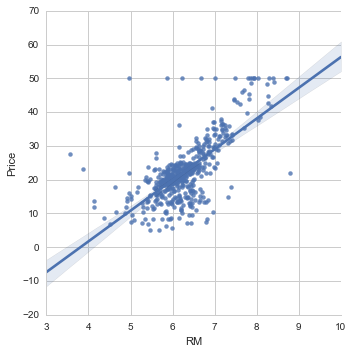

In [13]:
sns.lmplot('RM','Price',data = boston_df)

In [18]:
#when is yhe line best fit
# single variable fit it to price data
X = boston_df.RM

X.shape

(506,)

In [15]:
X = np.vstack(boston_df.RM)# to make it two dimensional

In [17]:
X.shape

(506, 1)

In [19]:
Y = boston_df.Price

In [20]:
#create an array in form of [X 1]
X = np.array([[value,1] for value in X]) # list comprehension to build a list

In [21]:
X

array([[ 6.575,  1.   ],
       [ 6.421,  1.   ],
       [ 7.185,  1.   ],
       ..., 
       [ 6.976,  1.   ],
       [ 6.794,  1.   ],
       [ 6.03 ,  1.   ]])

In [22]:
# to get the best fit value
m,b = np.linalg.lstsq(X,Y)[0]

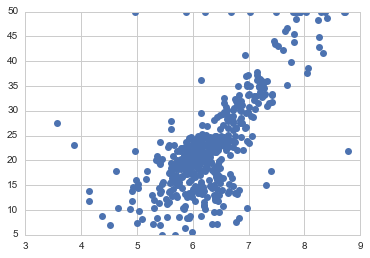

In [23]:
plt.plot(boston_df.RM,boston_df.Price,'o')

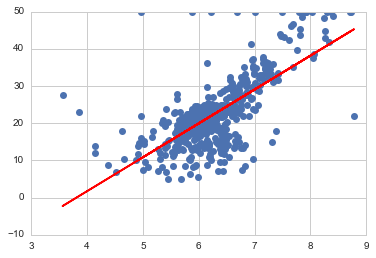

In [25]:
# now pllot the best fit line using numpy
# same as seaborn graph
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,m*x + b,'r',label ='Best Fit Line')

In [27]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print ('The root mean square error was %.2f' % rmse)


The root mean square error was 6.60


In [28]:
#scikit
import sklearn


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lreg = LinearRegression()

In [31]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

In [32]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print ('The estimated intercept co-effiecient is %2f' %lreg.intercept_)
print ('The number of coefficients used was %d ' %len(lreg.coef_))

The estimated intercept co-effiecient is 36.491103
The number of coefficients used was 13 


In [37]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns =['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [38]:
#cross_validation divide the data randomly
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [39]:
print (X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [40]:
#predict the house prices
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [44]:
print ('Fit a model X_train, and calculate the MSE with Y_train: %2f' % np.mean((Y_train-pred_train)**2))
print ('Fit a model X_train , and calculate MSE with X_test and Y_test: %2f' %np.mean((Y_test -pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 35.753059
Fit a model X_train , and calculate MSE with X_test and Y_test: 68.026949


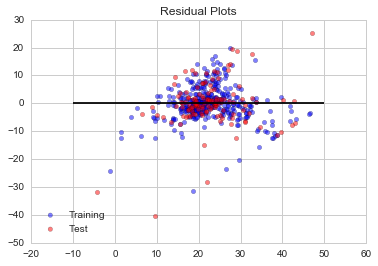

In [47]:
#residual plot
train = plt.scatter(pred_train,(pred_train - Y_train),c ='b',alpha =0.5)
test = plt.scatter(pred_test,(pred_test- Y_test),c ='r',alpha =0.5)
plt.hlines(y=0,xmin = -10,xmax = 50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')